# 03: Visualization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Austfi/xsnowForPatrol/blob/main/notebooks/03_visualization.ipynb)

Visualizing snowpack data is crucial for understanding patterns and communicating results. This notebook shows you how to create effective plots with xsnow data.

## What You'll Learn

- Plotting snow profiles (depth vs properties)
- Creating time series plots
- Multi-panel figures
- Customizing plots for presentations
- Temperature and density profiles


## Installation (For Colab Users)

If you're using Google Colab, run the cell below to install xsnow and dependencies. If you're running locally and have already installed xsnow, you can skip this cell.


In [1]:

%pip install -q numpy pandas xarray matplotlib seaborn dask netcdf4
%pip install -q git+https://gitlab.com/avacollabra/postprocessing/xsnow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.5/377.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 19.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have 

In [2]:
import xsnow
import matplotlib.pyplot as plt
import numpy as np

# Load sample data
ds = xsnow.single_profile_timeseries()
ds

%matplotlib inline


## Part 1: Plotting a Single Snow Profile

A snow profile shows properties (like density, temperature) as a function of depth. This is the classic "snow pit" visualization.


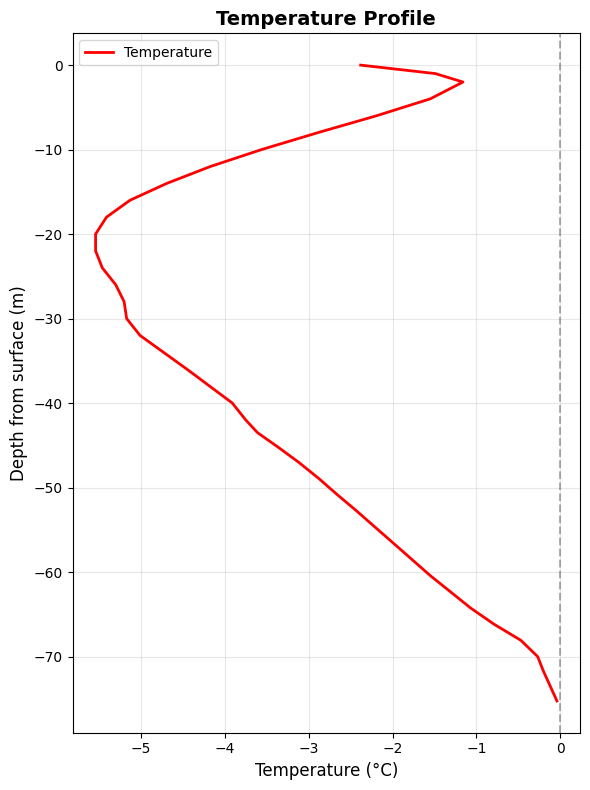

In [6]:
# Select a single profile (first location, first time)
profile = ds.isel(location=0, time=0, slope=0, realization=0)

# Get depth (z coordinate)
depth = profile.coords['z'].values
temp = profile['temperature'].values

# Plot temperature profile
fig, ax = plt.subplots(figsize=(6, 8))
ax.plot(temp, depth, 'r-', linewidth=2, label='Temperature')
ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)  # 0°C reference

ax.set_xlabel('Temperature (°C)', fontsize=12)
ax.set_ylabel('Depth from surface (m)', fontsize=12)
ax.set_title('Temperature Profile', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()


plt.tight_layout()
plt.show()


### Density Profile

Let's also plot density:



- Plot a density profile for a different time step (hint: change `time=0` to `time=5` or another index)
- Plot a profile for a different location (hint: change `location=0`)
- Create a plot showing both temperature and density on the same axes (hint: use `ax.plot()` twice with different colors)


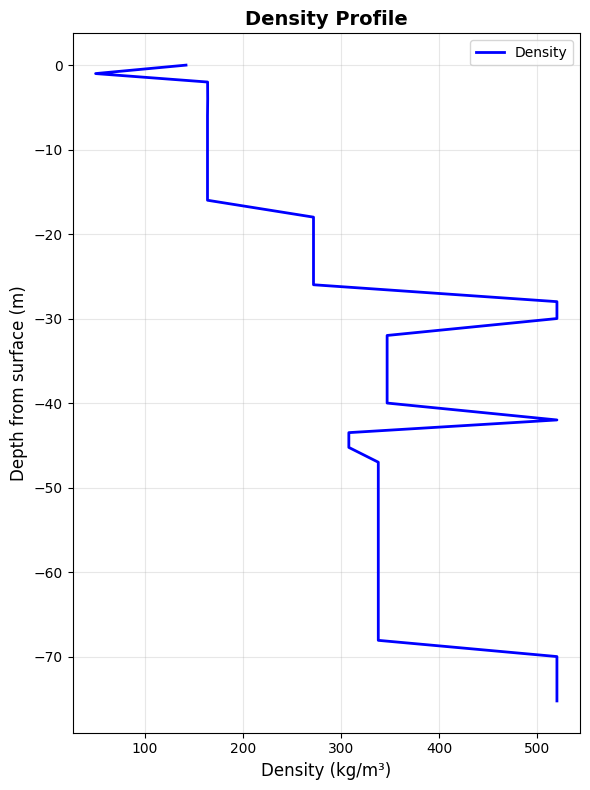

In [7]:
profile = ds.isel(location=0, time=0, slope=0, realization=0)
depth = profile.coords['z'].values
density = profile['density'].values

fig, ax = plt.subplots(figsize=(6, 8))
ax.plot(density, depth, 'b-', linewidth=2, label='Density')

ax.set_xlabel('Density (kg/m³)', fontsize=12)
ax.set_ylabel('Depth from surface (m)', fontsize=12)
ax.set_title('Density Profile', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


## Part 2: Multi-Panel Profile Plot

Combine multiple properties in one figure (like a real snow pit diagram):


**Now You Try**:
- Create a multi-panel plot with 4 subplots instead of 3 (hint: change `(1, 3, ...)` to `(2, 2, ...)`)
- Add a fourth variable to the plot (try grain type, grain size, or another available variable)
- Change the layout from horizontal `(1, 3, ...)` to vertical `(3, 1, ...)`


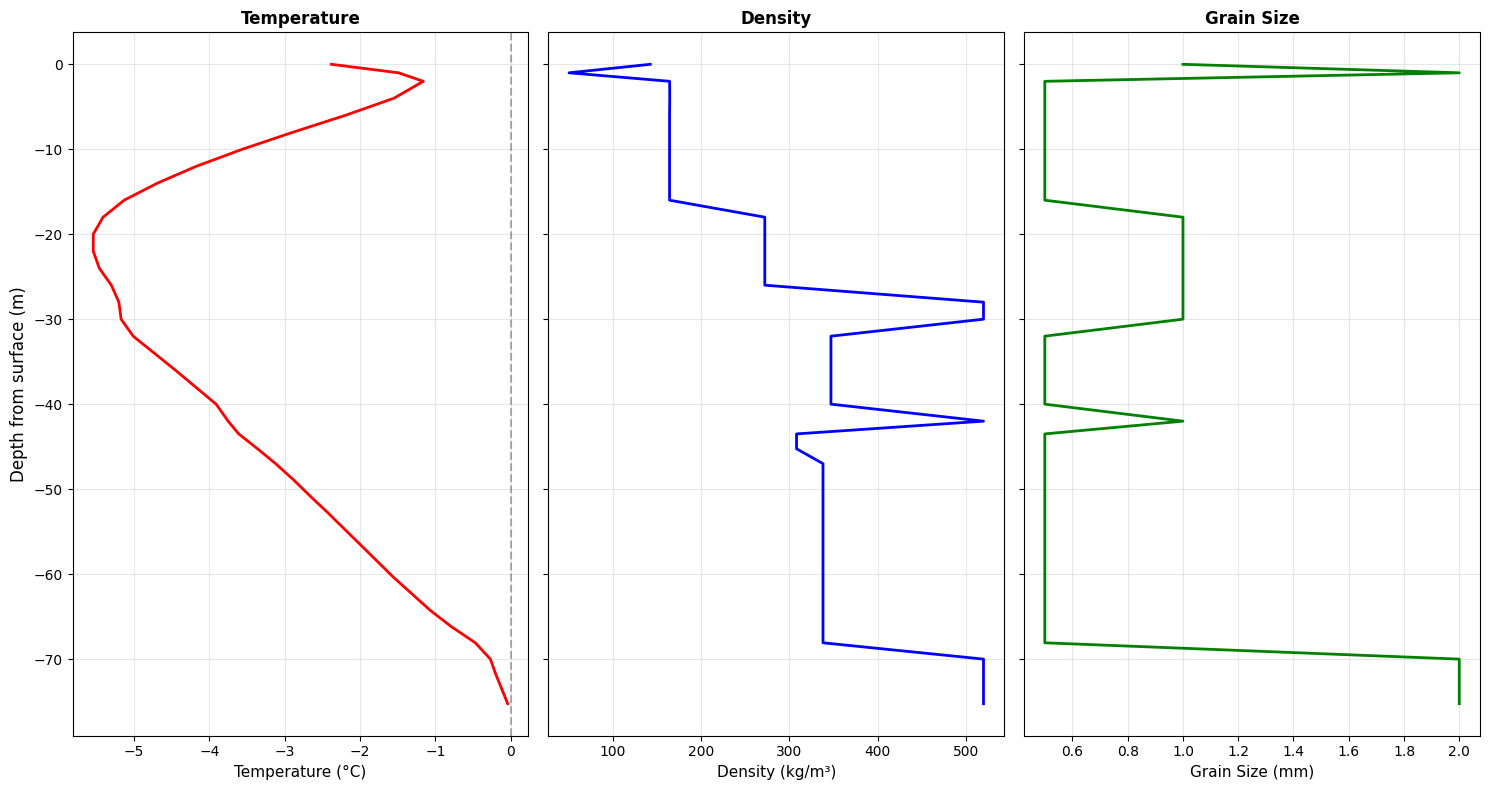

In [9]:
profile = ds.isel(location=0, time=0, slope=0, realization=0)
depth = profile.coords['z'].values

# Create figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)

# Temperature
axes[0].plot(profile['temperature'].values, depth, 'r-', linewidth=2)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0].set_xlabel('Temperature (°C)', fontsize=11)
axes[0].set_title('Temperature', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Density
axes[1].plot(profile['density'].values, depth, 'b-', linewidth=2)
axes[1].set_xlabel('Density (kg/m³)', fontsize=11)
axes[1].set_title('Density', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Grain size
axes[2].plot(profile['grain_size'].values, depth, 'g-', linewidth=2)
axes[2].set_xlabel('Grain Size (mm)', fontsize=11)
axes[2].set_title('Grain Size', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)


# Set shared y-axis label
axes[0].set_ylabel('Depth from surface (m)', fontsize=12)

plt.tight_layout()
plt.show()


## Part 3: Time Series Plots

Plot how snowpack properties change over time:


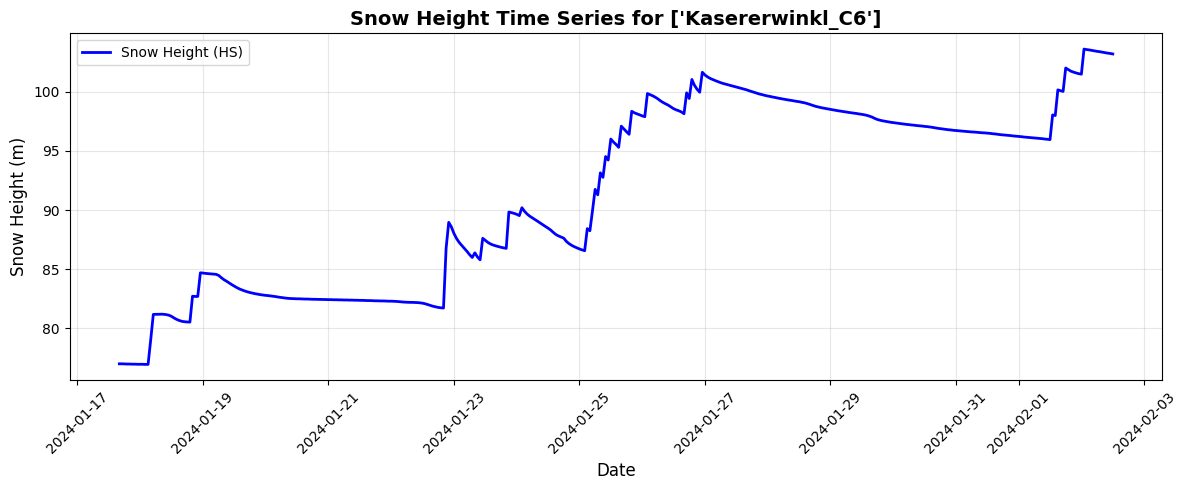

In [13]:
# Get time series of snow height
hs_series = ds['HS'].isel(location=0, slope=0, realization=0)
times = ds.coords['time'].values
loc = ds.coords['location'].values

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(times, hs_series.values, 'b-', linewidth=2, label='Snow Height (HS)')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Snow Height (m)', fontsize=12)
ax.set_title(f'Snow Height Time Series for {loc}', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Surface Temperature Time Series

Track surface layer temperature over time:


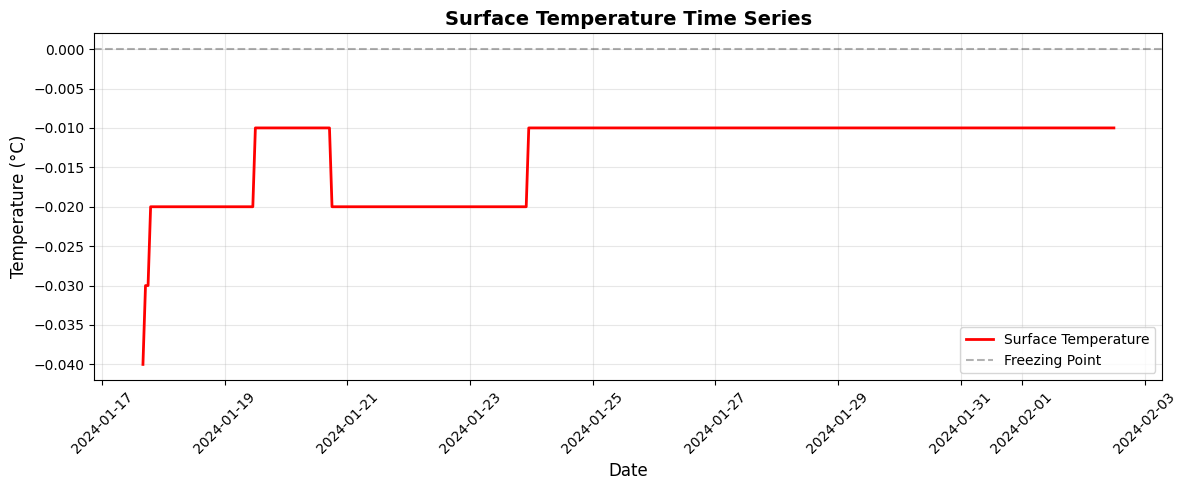

In [14]:
# Get surface temperature (layer 0) over time
surface_temp = ds['temperature'].isel(location=0, layer=0, slope=0, realization=0)
times = ds.coords['time'].values

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(times, surface_temp.values, 'r-', linewidth=2, label='Surface Temperature')
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3, label='Freezing Point')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Surface Temperature Time Series', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 4: Heatmap (Depth-Time)

A heatmap shows how properties change with both depth and time - very useful for seeing evolution:


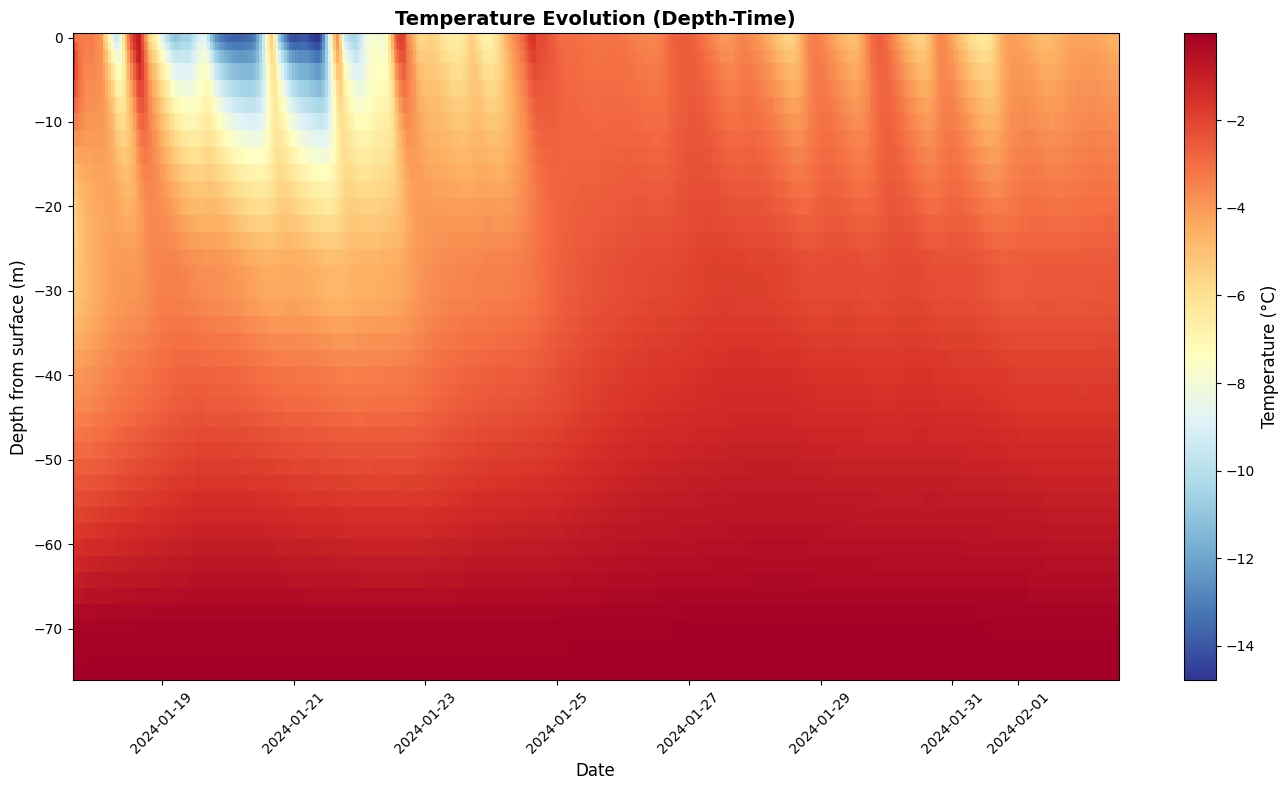

In [19]:
# Select one location
temp_data = ds['temperature'].isel(location=0, slope=0, realization=0)

# Get coordinates
times = ds.coords['time'].values
# Get z coordinates (depth) - use first time step as reference
z_coords = ds.coords['z'].isel(location=0, time=0, slope=0, realization=0).values
depth = z_coords

# Filter out NaN values from depth (layers that don't exist)
valid_mask = ~np.isnan(depth)
depth_clean = depth[valid_mask]

# Prepare data - temp_data shape is (time, layer)
# We need (layer, time) for plotting
temp_plot = temp_data.values.T

# Filter temperature data to match valid depth layers
temp_plot_clean = temp_plot[valid_mask, :]

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Use pcolormesh for better results with this data structure
# Ensure times doesn't have NaN values
if np.any(np.isnan(times)):
    # If times has NaN, filter them out
    times_valid = times[~np.isnan(times)]
    temp_plot_clean = temp_plot_clean[:, ~np.isnan(times)]
else:
    times_valid = times

im = ax.pcolormesh(times_valid, depth_clean, temp_plot_clean, cmap='RdYlBu_r', shading='auto')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Temperature (°C)', fontsize=12)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Depth from surface (m)', fontsize=12)
ax.set_title('Temperature Evolution (Depth-Time)', fontsize=14, fontweight='bold')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 5: Comparing Multiple Locations

If you have data from multiple locations, compare them:


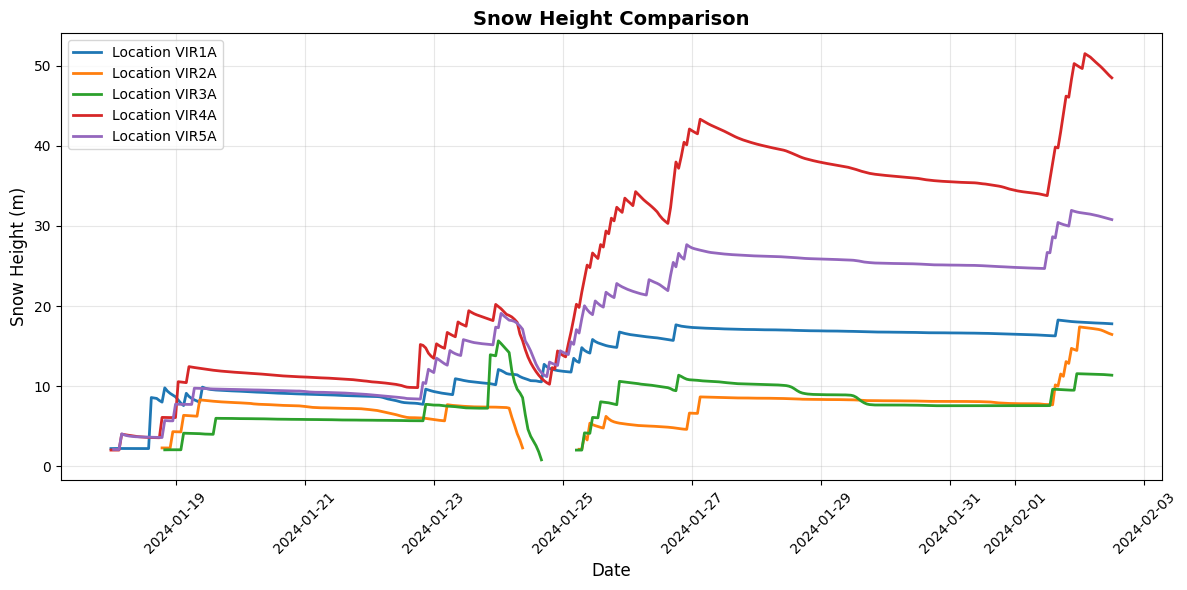

In [21]:
# Read in multiple locations and pro files
dm = xsnow.sample_data.snp_gridded_ds()

# Compare multiple locations
times = dm.coords['time'].values
n_locations = dm.sizes.get('location', 1)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each location
for i in range(n_locations):
    location_name = dm.coords['location'].values[i]
    hs_series = dm['HS'].isel(location=i, slope=0, realization=0)
    ax.plot(times, hs_series.values, linewidth=2, label=f'Location {location_name}')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Snow Height (m)', fontsize=12)
ax.set_title('Snow Height Comparison', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
